<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_9_1_Films_db_vizualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 9.1. Films database**

### **Data visualization with Matplotlib**

To complete the tasks, you will need to download the movie database and the genre database:

- **Movie database**

- **Genre database**

1. Return a list of the top 10 videos (**vote_average**) that have a vote count (**vote_count**) greater than the 3rd quartile of the vote distribution.

2. Group the table to get the **average revenue** and **average budget** per year for videos published from 2010 (inclusive) to 2016 (inclusive). Then, based on this, create a chart in which the average revenue is a column chart and the average budget is a line chart on the same axes. Format the X-axis and Y-axis as appropriate. Add a chart title and a legend that is in the upper right corner of the canvas, but outside of the axis area.

3. The movie database contains a column with the genre id (**genre_id**). On this basis, connect the movie database with the genre database, so that the name of the movie genre can be read in the movie database.

4. What genre of film from the database appears most often in it? How many movies of this genre are in the database?

5. Films of which genre have the longest **runtime** on average?

6. Create a duration histogram of movies in a genre with the highest average duration.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# download movies database csv file
movie = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/tmdb_movies.csv')


In [ ]:
# download genres database csv file
genre = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/tmdb_genres.csv')
genre.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [ ]:
# remove selected columns
movie_db = movie.drop(['homepage', 'id', 'original_language', 'original_title', 'overview', 'popularity', 'status', 'tagline'], axis=1,)
movie_db.head()

,Unnamed: 0,budget,release_date,revenue,runtime,title,vote_average,vote_count,genre_id
0,0,237000000,2009-12-10,2787965087,162.0,Avatar,7.2,11800,28.0
1,1,300000000,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,2015-10-26,880674609,148.0,Spectre,6.3,4466,28.0
3,3,250000000,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,2012-03-07,284139100,132.0,John Carter,6.1,2124,28.0


1. Return a list of the top 10 videos (**vote_average**) that have a vote count (**vote_count**) greater than the 3rd quartile of the vote distribution.

In [ ]:
vote_count_3q = movie_db['vote_count'].quantile(0.75)
top_10_videos = movie_db[movie_db['vote_count'] > vote_count_3q].sort_values('vote_average', ascending=False).head(10)
top_10_videos

,Unnamed: 0,budget,release_date,revenue,runtime,title,vote_average,vote_count,genre_id
1881,1881,25000000,1994-09-23,28341469,142.0,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,1972-03-14,245066411,175.0,The Godfather,8.4,5893,18.0
2294,2294,15000000,2001-07-20,274925095,125.0,Spirited Away,8.3,3840,14.0
3865,3865,3300000,2014-10-10,13092000,105.0,Whiplash,8.3,4254,18.0
2731,2731,13000000,1974-12-20,47542841,200.0,The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,1994-10-08,213928762,154.0,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,1993-11-29,321365567,195.0,Schindler's List,8.3,4329,18.0
662,662,63000000,1999-10-15,100853753,139.0,Fight Club,8.3,9413,18.0
2170,2170,806948,1960-06-16,32000000,109.0,Psycho,8.2,2320,18.0
1847,1847,25000000,1990-09-12,46836394,145.0,GoodFellas,8.2,3128,18.0


2. Group the table to get the **average revenue** and **average budget** per year for videos published from 2010 (inclusive) to 2016 (inclusive). Then, based on this, create a chart in which the average revenue is a column chart and the average budget is a line chart on the same axes. Format the X-axis and Y-axis as appropriate. Add a chart title and a legend that is in the upper right corner of the canvas, but outside of the axis area.

In [ ]:
# convert object type to datetmie type
movie_db['release_date'] = pd.to_datetime(movie_db['release_date']).dt.year
movie_db.head()

,Unnamed: 0,budget,release_date,revenue,runtime,title,vote_average,vote_count,genre_id
0,0,237000000,2009.0,2787965087,162.0,Avatar,7.2,11800,28.0
1,1,300000000,2007.0,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,2015.0,880674609,148.0,Spectre,6.3,4466,28.0
3,3,250000000,2012.0,1084939099,165.0,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,2012.0,284139100,132.0,John Carter,6.1,2124,28.0


In [ ]:
# grouped movies per indicated years to get average revenue and budget
years_range_movies = movie_db[(movie_db['release_date']>=2010) & (movie_db['release_date']<=2016)]
grouped_data = pd.pivot_table(years_range_movies, index=['release_date'], values=['budget', 'revenue'], aggfunc='mean')
grouped_data.round()

,budget,revenue
release_date,,
2010.0,34495411.0,90438110.0
2011.0,34772320.0,92004131.0
2012.0,34922032.0,116065915.0
2013.0,35523294.0,101348456.0
2014.0,30959888.0,101346599.0
2015.0,31132164.0,105439927.0
2016.0,45703269.0,139049586.0


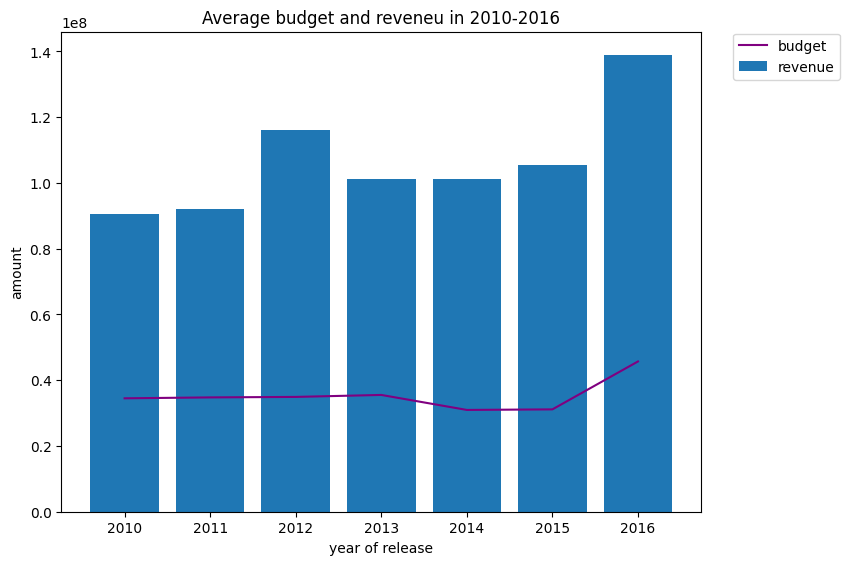

In [ ]:
# add the chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(grouped_data.index, grouped_data['budget'], label='budget', color='purple')
ax.bar(grouped_data.index, grouped_data['revenue'], label='revenue')
ax.set_xlabel('year of release')
ax.set_ylabel('amount')
ax.set_title('Average budget and reveneu in 2010-2016')
ax.legend(loc=(1.05, 0.9))
plt.show()

3. The movie database contains a column with the genre id (**genre_id**). On this basis, connect the movie database with the genre database, so that the name of the movie genre can be read in the movie database.

In [ ]:
genre_db = genre.rename(columns={'Unnamed: 0': 'genre_id'})
genre_db.head()

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [ ]:
videos = pd.DataFrame(pd.merge(movie_db, genre_db, how='inner', on='genre_id'))
videos.head()

,Unnamed: 0,budget,release_date,revenue,runtime,title,vote_average,vote_count,genre_id,genres
0,0,237000000,2009.0,2787965087,162.0,Avatar,7.2,11800,28.0,Action
1,2,245000000,2015.0,880674609,148.0,Spectre,6.3,4466,28.0,Action
2,3,250000000,2012.0,1084939099,165.0,The Dark Knight Rises,7.6,9106,28.0,Action
3,4,260000000,2012.0,284139100,132.0,John Carter,6.1,2124,28.0,Action
4,7,280000000,2015.0,1405403694,141.0,Avengers: Age of Ultron,7.3,6767,28.0,Action


4. What genre of film from the database appears most often in it? How many movies of this genre are in the database?

In [ ]:
videos['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

5. Films of which genre have the longest runtime on average?

In [ ]:
average_runtime_genre = videos.pivot_table(values='runtime', index='genres', aggfunc='mean').round()
average_runtime_genre.sort_values(by='runtime', ascending=False)

,runtime
genres,
History,134.0
War,126.0
Western,118.0
Drama,116.0
Adventure,113.0
Crime,112.0
TV Movie,110.0
Action,109.0
Science Fiction,109.0


6. Create a duration histogram of movies in a genre with the highest average duration.

<Axes: >

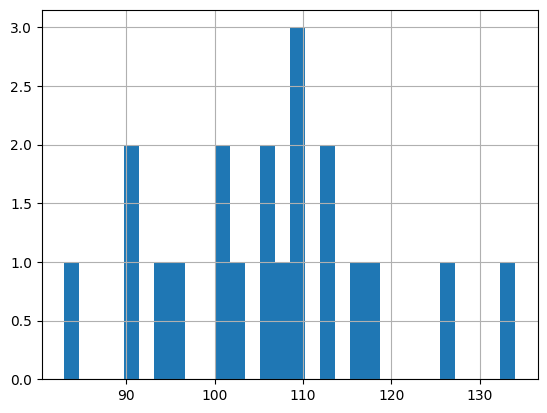

In [ ]:
average_runtime_genre['runtime'].hist(bins=30)